# Pharmaceutical Marketing Analysis for the USA Market

## The Goal of The Analysis
    - Answering the below Questions:
        - Which patient segment has the highest volume of new prescriptions?
        - Do certain patient segments generate higher sales per prescription than others?
        - Is there a specific marketing channel that is more effective at reaching a particular patient segment?
        - What is the average cost of a prescription for each drug?
        - How is the market share distributed among the top pharmaceutical companies based on total sales?
        - Which drug and company combination has the highest daily sales and prescriptions?
        - What is the correlation between marketing spend across all channels and daily sales/new prescriptions?
        - How does marketing spend change over time for the top-selling drugs?
        - Which marketing channel (DTC, HCP, or TV) shows the strongest return on investment (ROI)?

In [ ]:
# First is to Import the Libraries for the Project and upload the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
df_marketing = pd.read_csv('t2d_marketing_dataset_2024.csv')

In [6]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708 entries, 0 to 1707
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          1708 non-null   datetime64[ns]
 1   Drug_Name                     1708 non-null   object        
 2   Company                       1708 non-null   object        
 3   Daily_Prescriptions           1708 non-null   int64         
 4   Daily_Sales_USD               1708 non-null   float64       
 5   Marketing_Spend_DTC_Digital   1708 non-null   float64       
 6   Marketing_Spend_HCP_Outreach  1602 non-null   float64       
 7   Marketing_Spend_TV_Ads        1708 non-null   float64       
 8   New_Prescriptions             1708 non-null   int64         
 9   Patient_Segment               1708 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 133.6+ KB


In [5]:
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'])

### Which patient segment has the highest volume of new prescriptions?

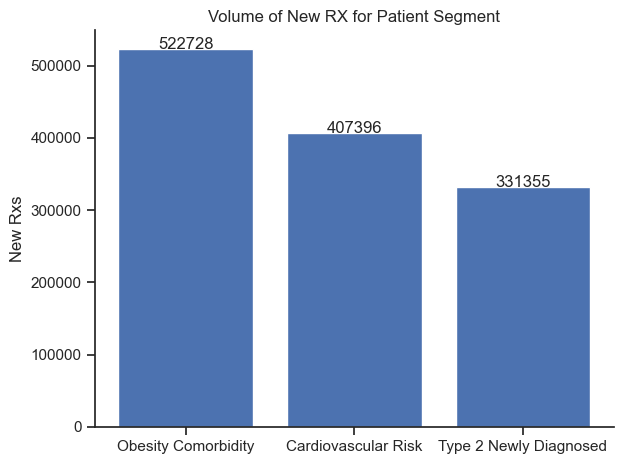

In [302]:
# Calculating highest volum of new prescriptions for patient segment
highest_new_rx = df_marketing.groupby('Patient_Segment')['New_Prescriptions'].sum().nlargest(3)

# Plotting data
plt.bar(highest_new_rx.index, highest_new_rx.values)

for i, v in enumerate(highest_new_rx):
    plt.text(i, v + 1, str(v), ha="center")

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Volume of New RX for Patient Segment')
plt.xlabel('')
plt.ylabel('New Rxs')
plt.tight_layout()
plt.show()

### Do certain patient segments generate higher sales per prescription than others?

In [ ]:
# Calculating the cost per rx in a new column 
df_marketing['RX_Cost'] = df_marketing['Daily_Sales_USD'] / df_marketing['Daily_Prescriptions']
df_marketing.inplace = True 

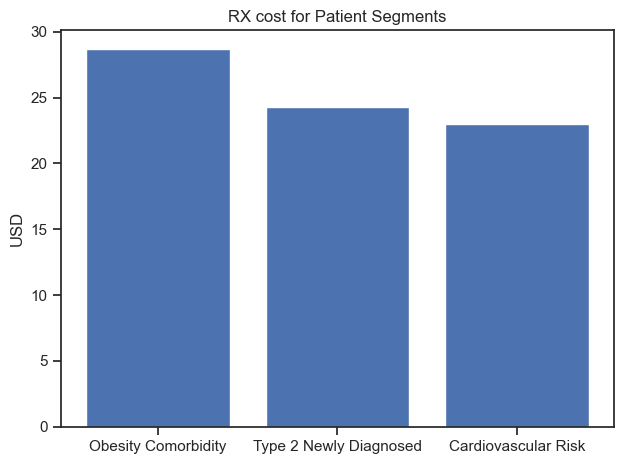

In [301]:
# Calculating the avg RX cost for each Patient Segment
avg_rx_cost = df_marketing.groupby('Patient_Segment')['RX_Cost'].mean().nlargest(3)

# Plotting data
plt.bar(avg_rx_cost.index, avg_rx_cost.values)

plt.title('RX cost for Patient Segments')
plt.xlabel('')
plt.ylabel('USD')
plt.tight_layout()
plt.show()

### Is there a specific marketing channel that is more effective at reaching a particular patient segment?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                        Rx_cost_DTC  Rx_cost_HCP  Rx_cost_TV
Patient_Segment                                             
Obesity Comorbidity        8.882798     6.055297   13.570373
Type 2 Newly Diagnosed     7.998239     5.403130   11.866043
Cardiovascular Risk        7.123242     4.772067   10.729616


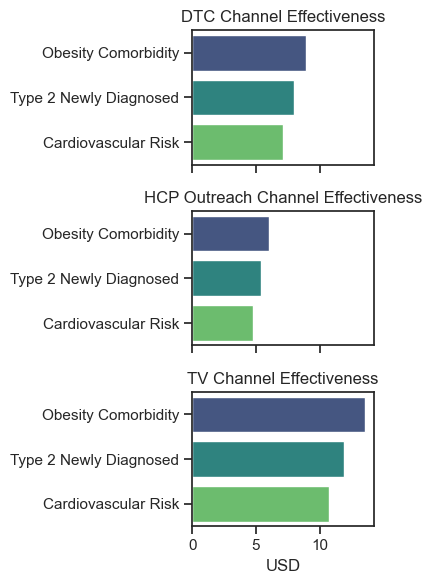

In [308]:
# We need to calculate the cost of every new rx from every channel spending
df_marketing['Rx_cost_DTC'] = df_marketing['Marketing_Spend_DTC_Digital'] / df_marketing['New_Prescriptions']
df_marketing['Rx_cost_HCP'] = df_marketing['Marketing_Spend_HCP_Outreach'] / df_marketing['New_Prescriptions']
df_marketing['Rx_cost_TV'] = df_marketing['Marketing_Spend_TV_Ads'] / df_marketing['New_Prescriptions']

# Now Calculating the avg of Rx cost per channel 
channel_effectiveness = df_marketing.groupby('Patient_Segment')[['Rx_cost_DTC', 'Rx_cost_HCP', 'Rx_cost_TV']].mean().sort_values(by='Rx_cost_DTC', ascending=False)
print(channel_effectiveness)

# Plotting the data
fig, ax = plt.subplots(3, 1, figsize=(4, 6), sharex=True)  

sns.barplot(data=channel_effectiveness, x='Rx_cost_DTC', y=channel_effectiveness.index, ax=ax[0], palette='viridis')
ax[0].set_title('DTC Channel Effectiveness')
ax[0].set_ylabel('')
ax[0].set_xlabel('')


sns.barplot(data=channel_effectiveness, x='Rx_cost_HCP', y=channel_effectiveness.index, ax=ax[1], palette='viridis')
ax[1].set_title('HCP Outreach Channel Effectiveness')
ax[1].set_ylabel('')
ax[1].set_xlabel('')


sns.barplot(data=channel_effectiveness, x='Rx_cost_TV', y=channel_effectiveness.index, ax=ax[2], palette='viridis')
ax[2].set_title('TV Channel Effectiveness')
ax[2].set_ylabel('')
ax[2].set_xlabel('USD')
ax[2].set_xlim(ax[0].get_xlim())  

plt.legend().remove()
plt.tight_layout()
plt.show()


### What is the average cost of a prescription for each drug?

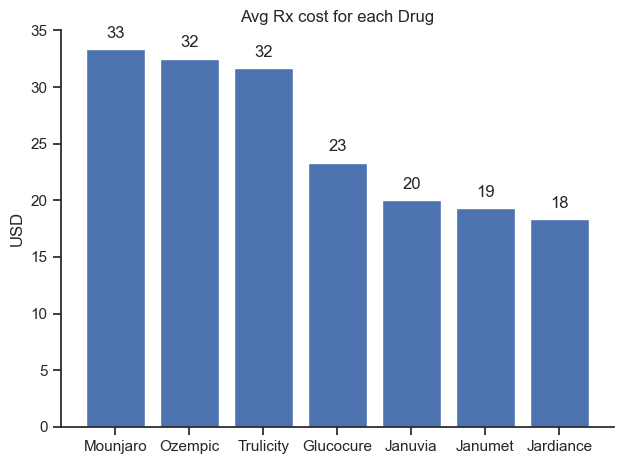

In [294]:
# Since we have created the Rx cost before so we will group drugs directly
avg_Rxcost_drug = df_marketing.groupby('Drug_Name')['RX_Cost'].mean().sort_values(ascending=False)

# Plotting data 
plt.bar(avg_Rxcost_drug.index, avg_Rxcost_drug.values)

for i, v in enumerate(avg_Rxcost_drug):
    plt.text(i, v + 1, str(round(v)), ha="center")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Avg Rx cost for each Drug')
plt.xlabel('')
plt.ylabel('USD')
plt.tight_layout()
plt.show()

### How is the market share distributed among the top pharmaceutical companies based on total sales?

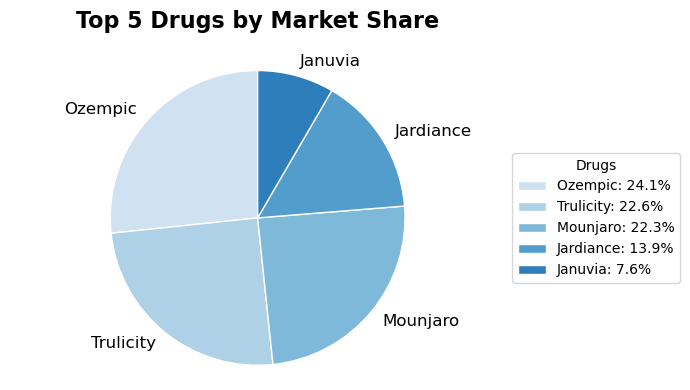

In [133]:
# Calculating the total sales for each drug 
market_share = df_marketing.groupby('Drug_Name')['Daily_Sales_USD'].sum().sort_values(ascending=False).head(5)
# Calculating total market size 
total_market = round(df_marketing['Daily_Sales_USD'].sum())
# Calculating the market share percentages for each drug 
marketshare_Percentage = (market_share / total_market) * 100
# Plotting data in a Pie chart. N.B. the pie chart is the best visualization for the market share but it is best performance with only 5 inputs not more so i filtered the drugs on the highest 5.
# Coloring the Pie chart
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(marketshare_Percentage)))
# Plot the pie chart
plt.figure(figsize=(7, 4))

wedges, texts = plt.pie(
    marketshare_Percentage,
    labels=marketshare_Percentage.index,
    colors=colors,
    startangle=90,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={'fontsize': 12}
)


plt.title('Top 5 Drugs by Market Share', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')

# Add legend with the exact calculated values
legend_labels = [f'{drug}: {percent:.1f}%' 
                for drug, percent in zip(marketshare_Percentage.index, marketshare_Percentage)]
plt.legend(wedges, legend_labels, title="Drugs", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### Which drug and company combination has the highest daily sales and prescriptions?

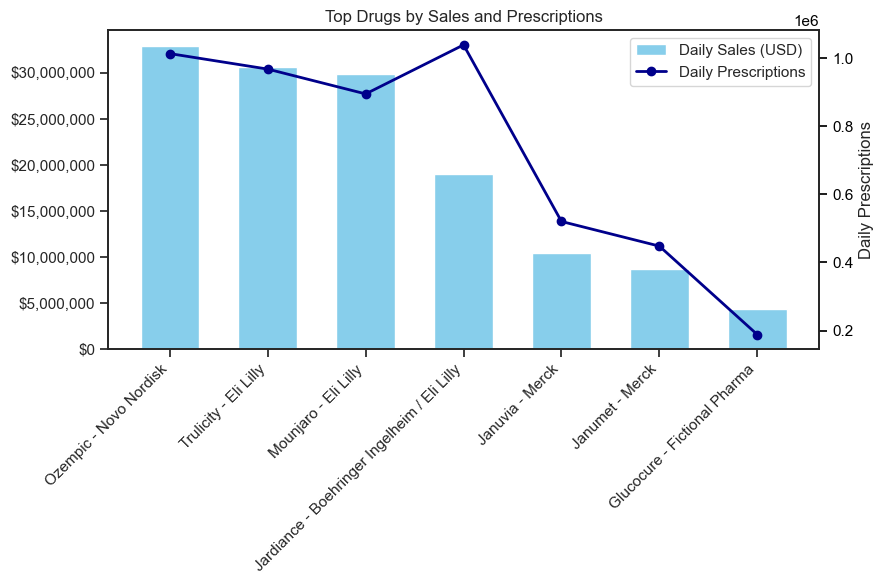

In [284]:
# Calculate highest sales and prescriptions
highest_sales_Rx = df_marketing.groupby(['Drug_Name', 'Company'])[['Daily_Sales_USD','Daily_Prescriptions']].sum().sort_values(by='Daily_Sales_USD', ascending=False)

# Compining the drug name and compnay name in one column
highest_sales_Rx['Drug_Company'] = highest_sales_Rx.index.get_level_values('Drug_Name') + " - " + highest_sales_Rx.index.get_level_values('Company')

#Plotting a dual axis graph for the data
fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot sales on the primary axis
bar_width = 0.6
bar_positions = range(len(highest_sales_Rx))
ax1.bar(bar_positions, highest_sales_Rx['Daily_Sales_USD'], bar_width, color='skyblue', label='Daily Sales (USD)')

# Format the sales axis with dollar signs and commas
formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Top Drugs by Sales and Prescriptions')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(highest_sales_Rx[('Drug_Company')], rotation=45, ha='right')

# Create a secondary axis for prescriptions
ax2 = ax1.twinx()

# Plot prescriptions on the secondary axis as a line
ax2.plot(bar_positions, highest_sales_Rx['Daily_Prescriptions'], marker='o', color='darkblue', linestyle='-', linewidth=2, label='Daily Prescriptions')
ax2.set_ylabel('Daily Prescriptions')
ax2.tick_params(axis='y', colors='black')

# Add a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()

plt.show()

###  What is the correlation between marketing spend across all channels and daily sales/new prescriptions?

Slope: 4.0921528280209944 Intercept: 1422.4721698191934
Slope: 0.025543074157698523 Intercept: 266.47922105426835


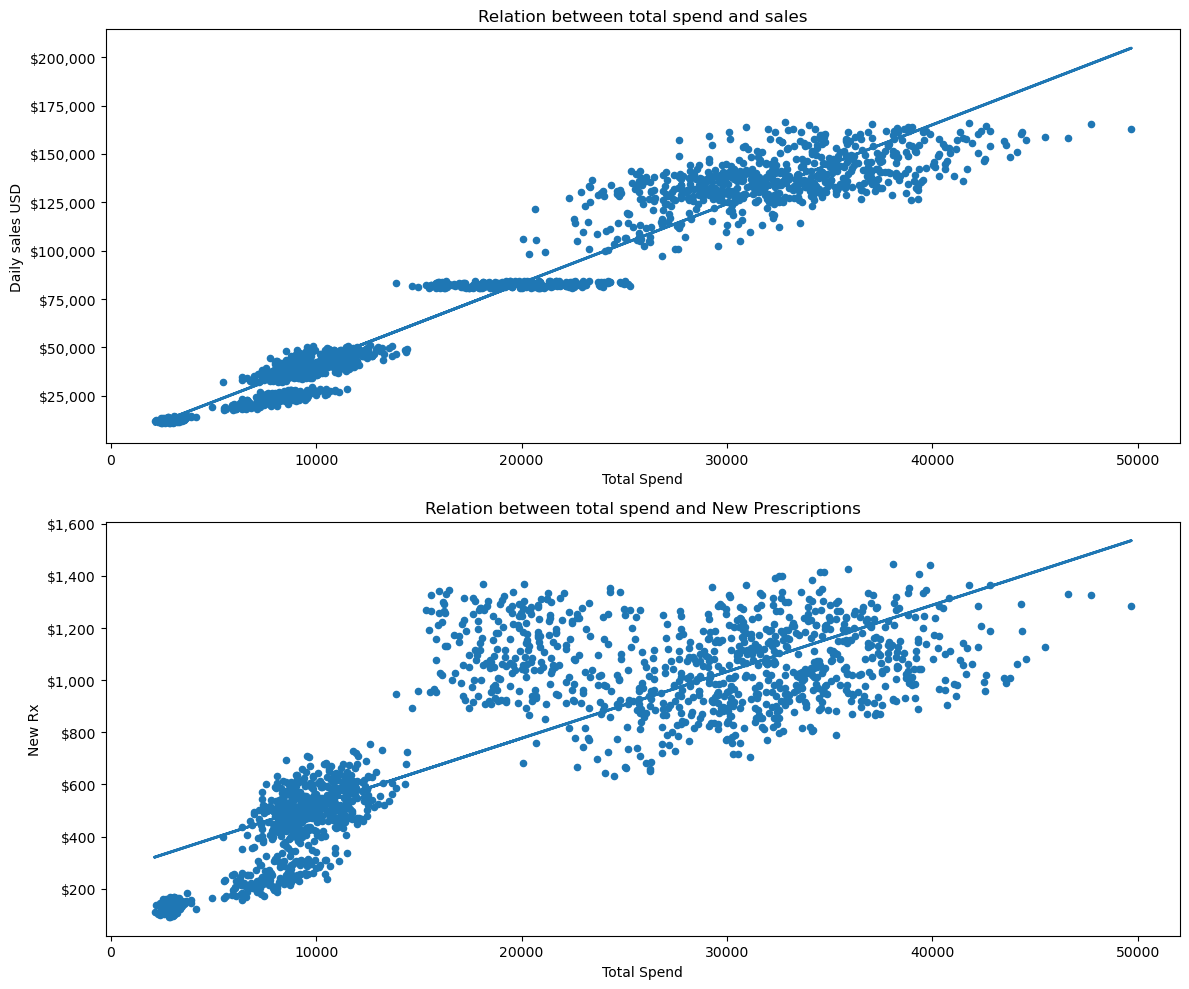

In [186]:
# drop nan values in the needed columns 
df_marketing = df_marketing.dropna(subset=['Marketing_Spend_HCP_Outreach'])

# Creating new column for the sum of all channels spends
df_marketing['com_spend'] = df_marketing['Marketing_Spend_HCP_Outreach'] + df_marketing['Marketing_Spend_DTC_Digital'] + df_marketing['Marketing_Spend_TV_Ads']

# Plotting 2 scattered plot for the total spend vs sales and total spend vs new rx
sub1 = (df_marketing[['com_spend','Daily_Sales_USD']]).copy()
sub2 = (df_marketing[['com_spend','New_Prescriptions']]).copy()
a = sub1['com_spend'].values; b = sub1['Daily_Sales_USD'].values
c = sub2['com_spend'].values; d = sub2['New_Prescriptions'].values

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Linear regression calculation
coeff1 = np.polyfit(a, b, 1)
b_fit = np.polyval(coeff1, a)
coeff2 = np.polyfit(c, d, 1)
d_fit = np.polyval(coeff2, c)
print("Slope:", coeff1[0], "Intercept:", coeff1[1])
print("Slope:", coeff2[0], "Intercept:", coeff2[1])

formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax[0].yaxis.set_major_formatter(formatter)
ax[0].scatter(a,b,s=20)
ax[0].plot(a, b_fit, linewidth=2)
ax[0].set_xlabel('Total Spend')
ax[0].set_ylabel('Daily sales USD')
ax[0].set_title('Relation between total spend and sales')

ax[1].scatter(c, d, s=20)
ax[1].plot(c, d_fit, linewidth=2)
ax[1].set_xlabel('Total Spend')
ax[1].set_ylabel('New Rx')
ax[1].set_title('Relation between total spend and New Prescriptions')
ax[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

###  How does marketing spend change over time for the top-selling drugs?

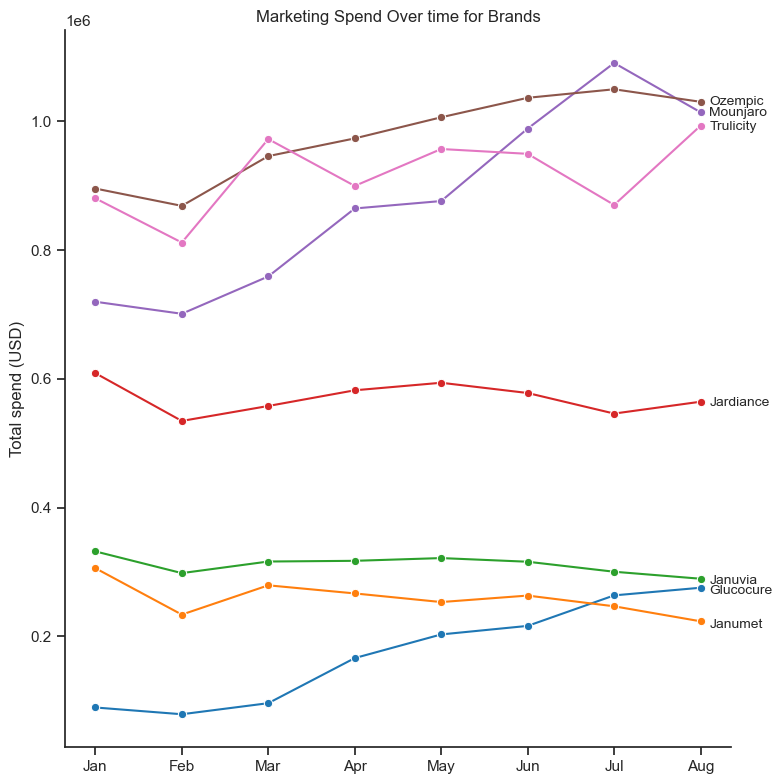

In [281]:
# Cleaning date column and converting it to months
df_marketing['month_n'] = df_marketing['Date'].dt.month
df_marketing['month'] = df_marketing['month_n'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
# grouping date, drugs and total spend for all channels
spend_overtime = df_marketing.groupby(['month_n', 'month', 'Drug_Name'])['com_spend'].sum().reset_index()

# Pivotting the grouped data in one table
df_pivot = spend_overtime.pivot_table(index='month', columns='Drug_Name', values='com_spend')

# Sort the index in a chronological order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
df_pivot = df_pivot.reindex(month_order)

# plotting the data on a line chart
fig, ax = plt.subplots (figsize=(8,8))

sns.lineplot(data=df_pivot, dashes=False, legend='full', palette='tab10', marker='o')
sns.despine() # remove top and right spines

plt.title('Marketing Spend Over time for Brands')
plt.ylabel('Total spend (USD)')
plt.xlabel('')
plt.legend().remove()

# Sort the brands to prevent labels from overlapping
last_points = df_pivot.iloc[-1]
last_points_sorted = last_points.sort_values(ascending=False)

# Add an offset to stack the labels vertically
offset = 900  
# Loop through the sorted data points to add the text labels
for i, (brand, spend) in enumerate(last_points_sorted.items()):
    plt.text(7.1, spend - (i * offset), brand, va='center', fontsize=10)    

plt.tight_layout()
plt.show()

###  Which marketing channel (DTC, HCP, or TV) shows the strongest return on investment (ROI)?

ROI Analysis for Marketing Channels:
              ROI (Sales)  ROI (New Prescriptions)
DTC Digital     12.120392                 0.075665
HCP Outreach    16.733149                 0.105045
TV Ads           7.964627                 0.049585

--- Summary ---
The channel with the strongest ROI on sales is: HCP Outreach
The channel with the strongest ROI on new prescriptions is: HCP Outreach


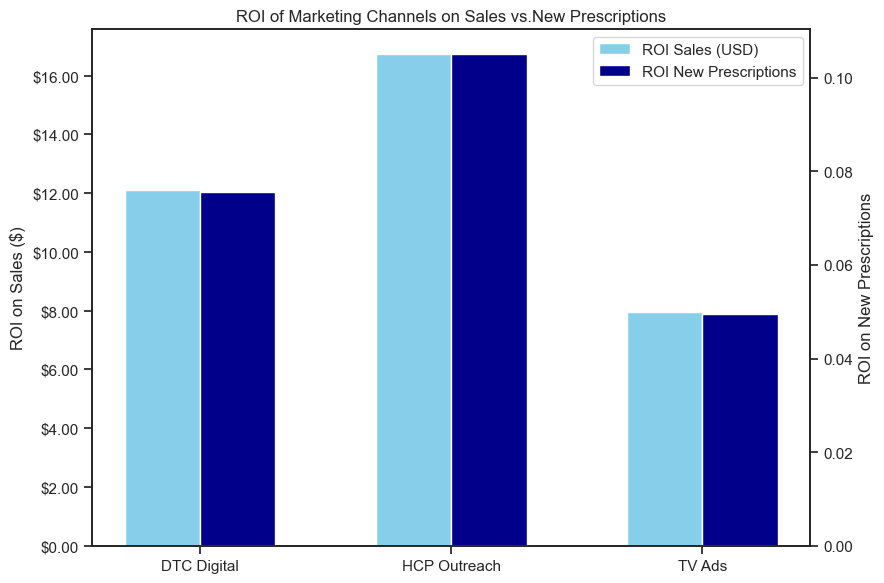

In [309]:
# Define the marketing spend columns and the return columns
spend_columns = ['Marketing_Spend_DTC_Digital', 'Marketing_Spend_HCP_Outreach', 'Marketing_Spend_TV_Ads']
return_columns = ['Daily_Sales_USD', 'New_Prescriptions']

# Dictionaries to store the ROI results
roi_sales = {}
roi_prescriptions = {}

# Calculate ROI for each channel
for spend_col in spend_columns:
    # ROI for Sales
    # np.polyfit returns the coefficients of the polynomial, where the first element is the slope
    sales_coeff = np.polyfit(df_marketing[spend_col], df_marketing['Daily_Sales_USD'], 1)
    roi_sales[spend_col] = sales_coeff[0]

    # ROI for New Prescriptions
    prescriptions_coeff = np.polyfit(df_marketing[spend_col], df_marketing['New_Prescriptions'], 1)
    roi_prescriptions[spend_col] = prescriptions_coeff[0]

# Create a DataFrame to present the results
roi_df = pd.DataFrame({
    'ROI (Sales)': roi_sales,
    'ROI (New Prescriptions)': roi_prescriptions
})

# Rename the index for better readability
roi_df = roi_df.rename(index={
    'Marketing_Spend_DTC_Digital': 'DTC Digital',
    'Marketing_Spend_HCP_Outreach': 'HCP Outreach',
    'Marketing_Spend_TV_Ads': 'TV Ads'
})

print("ROI Analysis for Marketing Channels:")
print(roi_df)
print("\n--- Summary ---")
# Find the channel with the highest ROI for sales
best_sales_roi = roi_df['ROI (Sales)'].idxmax()
print(f"The channel with the strongest ROI on sales is: {best_sales_roi}")

# Find the channel with the highest ROI for new prescriptions
best_prescriptions_roi = roi_df['ROI (New Prescriptions)'].idxmax()
print(f"The channel with the strongest ROI on new prescriptions is: {best_prescriptions_roi}")

fig, ax1 = plt.subplots(figsize=(9, 6))

# Plot primary axis for sales
bar_width = 0.3
bar_positions_sales = np.arange(len(roi_df))
bar_positions_prescriptions = bar_positions_sales + bar_width
ax1.bar(bar_positions_sales, roi_df['ROI (Sales)'], bar_width, color='skyblue', label='ROI Sales (USD)')

# Create a secondary axis for prescriptions
ax2 = ax1.twinx()

ax2.bar(bar_positions_prescriptions, roi_df['ROI (New Prescriptions)'], bar_width, color='darkblue', label='ROI New Prescriptions')

# Set x-axis labels and ticks to be in the center of the bar groups
ax1.set_xticks(bar_positions_sales + bar_width / 2)
ax1.set_xticklabels(roi_df.index, rotation=0)
ax1.set_ylabel('ROI on Sales ($)')
ax2.set_ylabel('ROI on New Prescriptions')
ax1.set_title('ROI of Marketing Channels on Sales vs.New Prescriptions')

# Add a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Format the sales axis with dollar signs
formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.2f}')
ax1.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()
